# Title of ML project : Cosmetics & Beauty Products Reviews of Top Brands from Nyka.com

# Name : Renjitha E R

# Organization : Entri Elevate

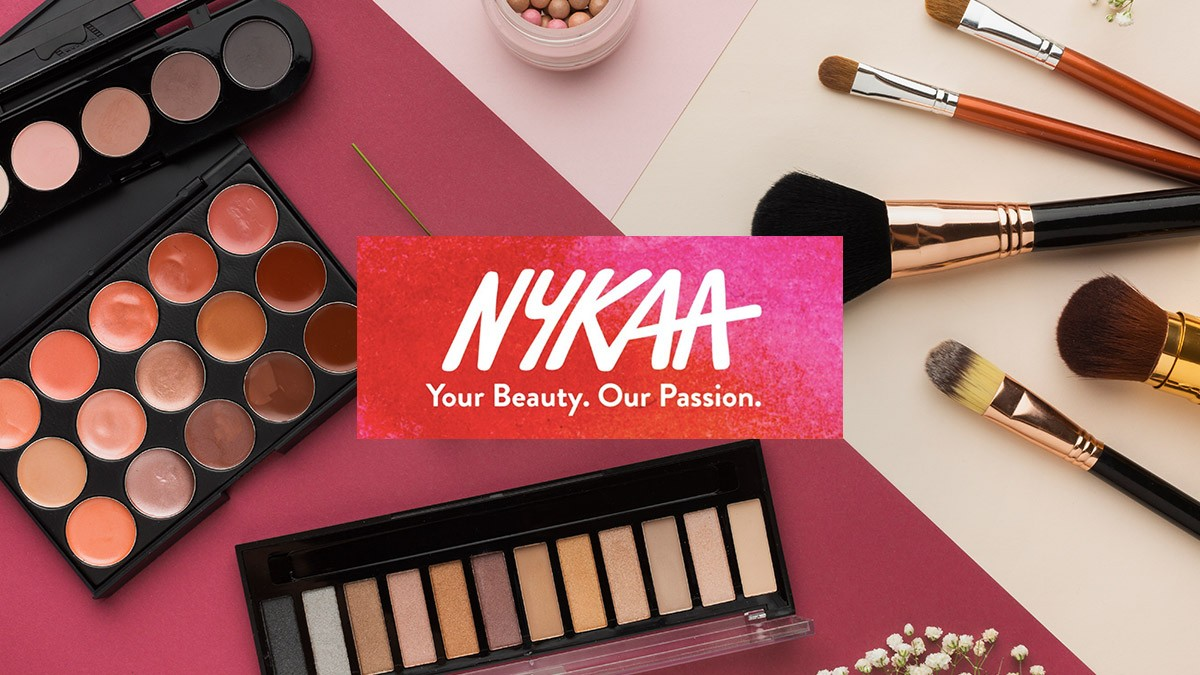

# Overview of Problem Statement

The aim of this project is to analyze and predict insights from product reviews of cosmetics brands using machine learning techniques. The dataset contains product reviews from Nykaa, including various features that describe the reviews and user sentiments. The ultimate goal is to build an accurate predictive model that can identify patterns, sentiment, or ratings based on the available features.

By performing extensive data preprocessing, exploratory data analysis (EDA), and applying multiple machine learning models, this project seeks to understand the key factors influencing product ratings, sentiment trends, or user behavior.


# Objective
To forecast the cosmetics and beauty product brands that will experience an increase in sales in the future.

# Data Description

Source Of Data: The dataset collected from Kaggle

Feature :

product_id             : Identifier for the product.
brand_name             : Name of the brand.
review_id              : Identifier for the review.
review_title           : Title of the review.
review_text	           : Content of the review.
author	               : Name of the review author.
review_date            : Date of the review.
review_rating          : Rating given by the reviewer.
is_a_buyer             : Indicates if the reviewer is a verified buyer.
pro_user               : Indicates if the reviewer is a professional user.
review_label           : Label assigned to the review.
product_title          : Title of the product.
mrp                    : Maximum retail price of the product.
price                  : Current price of the product.
product_rating         : Average rating of the product.
product_rating_count   : Count of ratings for the product.
product_tags           : Tags associated with the product.
product_url            : URL of the product page.

# Data Collection

In [9]:
import pandas as pd

# Load the uploaded CSV file
file_path = 'nyka_top_brands_cosmetics_product_reviews..csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
data.info(), data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61284 entries, 0 to 61283
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            61284 non-null  int64  
 1   brand_name            61284 non-null  object 
 2   review_id             61284 non-null  int64  
 3   review_title          61284 non-null  object 
 4   review_text           61275 non-null  object 
 5   author                61284 non-null  object 
 6   review_date           61284 non-null  object 
 7   review_rating         61283 non-null  float64
 8   is_a_buyer            61284 non-null  bool   
 9   pro_user              61284 non-null  bool   
 10  review_label          48249 non-null  object 
 11  product_title         61284 non-null  object 
 12  mrp                   61284 non-null  int64  
 13  price                 61284 non-null  int64  
 14  product_rating        61284 non-null  float64
 15  product_rating_coun

(None,
    product_id brand_name  review_id                         review_title  \
 0      781070       Olay   16752142                 Worth buying 50g one   
 1      781070       Olay   14682550           Best cream to start ur day   
 2      781070       Olay   15618995  perfect for summers dry for winters   
 3      781070       Olay   13474509                    Not a moisturizer   
 4      781070       Olay   16338982                              Average   
 
                                          review_text          author  \
 0  Works as it claims. Could see the difference f...   Ashton Dsouza   
 1  It does what it claims . Best thing is it smoo...    Amrit Neelam   
 2  I have been using this product for months now....    Sanchi Gupta   
 3  i have an oily skin, while this whip acts as a...      Ruchi Shah   
 4  It's not that good. Please refresh try for oth...  Sukanya Sarkar   
 
            review_date  review_rating  is_a_buyer  pro_user    review_label  \
 0  2021-

# Gain insights into the data distribution, relationships, and potential patterns.

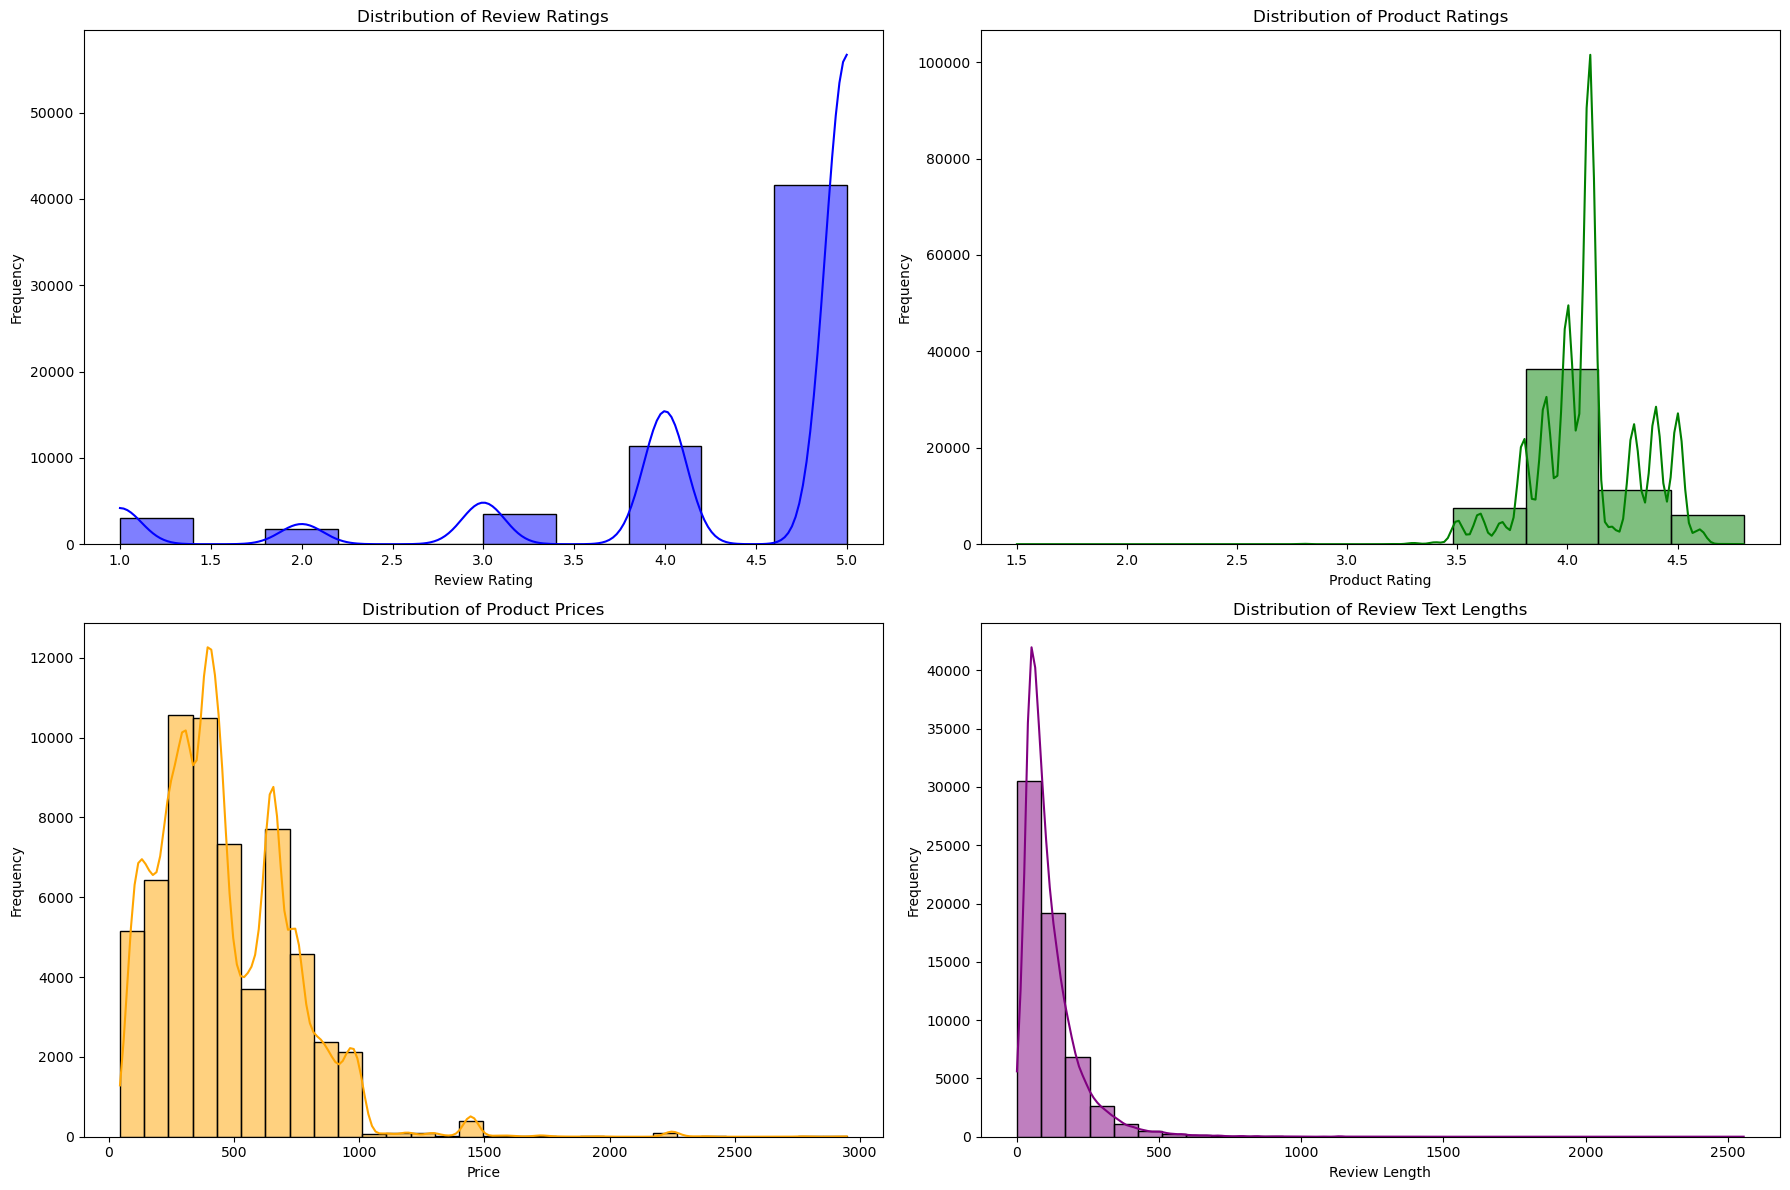

,product_id,review_id,review_rating,mrp,price,product_rating,product_rating_count
count,6.128400e+04,6.128400e+04,61283.000000,61284.000000,61284.000000,61284.000000,61284.000000
mean,7.983802e+05,1.484995e+07,4.414781,573.260247,462.129512,4.099130,7582.963840
std,1.281418e+06,7.383506e+06,1.062547,324.098930,264.876964,0.235945,14463.246136
min,2.500000e+02,9.600000e+01,1.000000,75.000000,45.000000,1.500000,1.000000
25%,1.604880e+05,1.102373e+07,4.000000,300.000000,262.000000,4.000000,1760.000000
50%,4.524430e+05,1.525142e+07,5.000000,599.000000,400.000000,4.100000,3925.000000
75%,7.665290e+05,2.002927e+07,5.000000,799.000000,639.000000,4.300000,8720.000000
max,7.749427e+06,2.963031e+07,5.000000,3874.000000,2947.000000,4.800000,98477.000000


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics for numerical columns
summary_stats = data.describe()

# Visualizing distributions of key numerical variables
plt.figure(figsize=(18, 12))

# Review ratings distribution
plt.subplot(2, 2, 1)
sns.histplot(data['review_rating'], bins=10, kde=True, color='blue')
plt.title("Distribution of Review Ratings")
plt.xlabel("Review Rating")
plt.ylabel("Frequency")

# Product ratings distribution
plt.subplot(2, 2, 2)
sns.histplot(data['product_rating'], bins=10, kde=True, color='green')
plt.title("Distribution of Product Ratings")
plt.xlabel("Product Rating")
plt.ylabel("Frequency")

# Price distribution
plt.subplot(2, 2, 3)
sns.histplot(data['price'], bins=30, kde=True, color='orange')
plt.title("Distribution of Product Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")

# Review lengths distribution
data['review_length'] = data['review_text'].dropna().apply(len)
plt.subplot(2, 2, 4)
sns.histplot(data['review_length'], bins=30, kde=True, color='purple')
plt.title("Distribution of Review Text Lengths")
plt.xlabel("Review Length")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Data Preprocessing - Data Cleaning

In [35]:
# Identify columns with missing values and their percentage
missing_values = data.isnull().sum() / len(data) * 100
missing_columns = missing_values[missing_values > 0].sort_values(ascending=False)

# Display columns with missing values
missing_columns

product_tags     77.968148
review_label     21.269826
review_text       0.014686
review_length     0.014686
review_rating     0.001632
dtype: float64

In [37]:
# Drop 'product_tags' column due to high percentage of missing values
data_cleaned = data.drop(columns=['product_tags'])

# Impute missing values
data_cleaned['review_text'].fillna("", inplace=True)  # Fill missing review text with empty string
data_cleaned['review_length'].fillna(0, inplace=True)  # Set review length to 0 for missing text
data_cleaned['review_rating'].fillna(data['review_rating'].median(), inplace=True)  # Median imputation for ratings
data_cleaned['review_label'].fillna(data['review_label'].mode()[0], inplace=True)  # Mode imputation for labels

# Verify missing values are handled
data_cleaned.isnull().sum()

C:\Users\user\AppData\Local\Temp\ipykernel_11932\982159769.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['review_text'].fillna("", inplace=True)  # Fill missing review text with empty string
C:\Users\user\AppData\Local\Temp\ipykernel_11932\982159769.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

product_id              0
brand_name              0
review_id               0
review_title            0
review_text             0
author                  0
review_date             0
review_rating           0
is_a_buyer              0
pro_user                0
review_label            0
product_title           0
mrp                     0
price                   0
product_rating          0
product_rating_count    0
product_url             0
review_length           0
dtype: int64

In [47]:
# Re-initialize data for processing
data_outliers_removed = data_cleaned.copy()

# Function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Columns to check for outliers
columns_to_check = ['price', 'mrp', 'product_rating_count']

# Reapply outlier removal
for col in columns_to_check:
    data_outliers_removed = remove_outliers(data_outliers_removed, col)

# Check skewness of numerical columns
skewness = data_outliers_removed[['price', 'mrp', 'product_rating_count', 'review_length']].skew()

# Apply log transformation to highly skewed features
import numpy as np

data_transformed = data_outliers_removed.copy()
for col in skewness[abs(skewness) > 1].index:  # Transform only features with high skewness
    data_transformed[col] = data_transformed[col].apply(lambda x: np.log1p(x))  # log1p handles zero values

# Recalculate skewness after transformation
skewness_after = data_transformed[['price', 'mrp', 'product_rating_count', 'review_length']].skew()

# Output results
print("Skewness before transformation:\n", skewness)
print("\nSkewness after transformation:\n", skewness_after)

Skewness before transformation:
 price                   0.410187
mrp                     0.284697
product_rating_count    0.909480
review_length           3.191856
dtype: float64

Skewness after transformation:
 price                   0.410187
mrp                     0.284697
product_rating_count    0.909480
review_length          -0.430519
dtype: float64


# Exploratory Data Analysis (EDA)

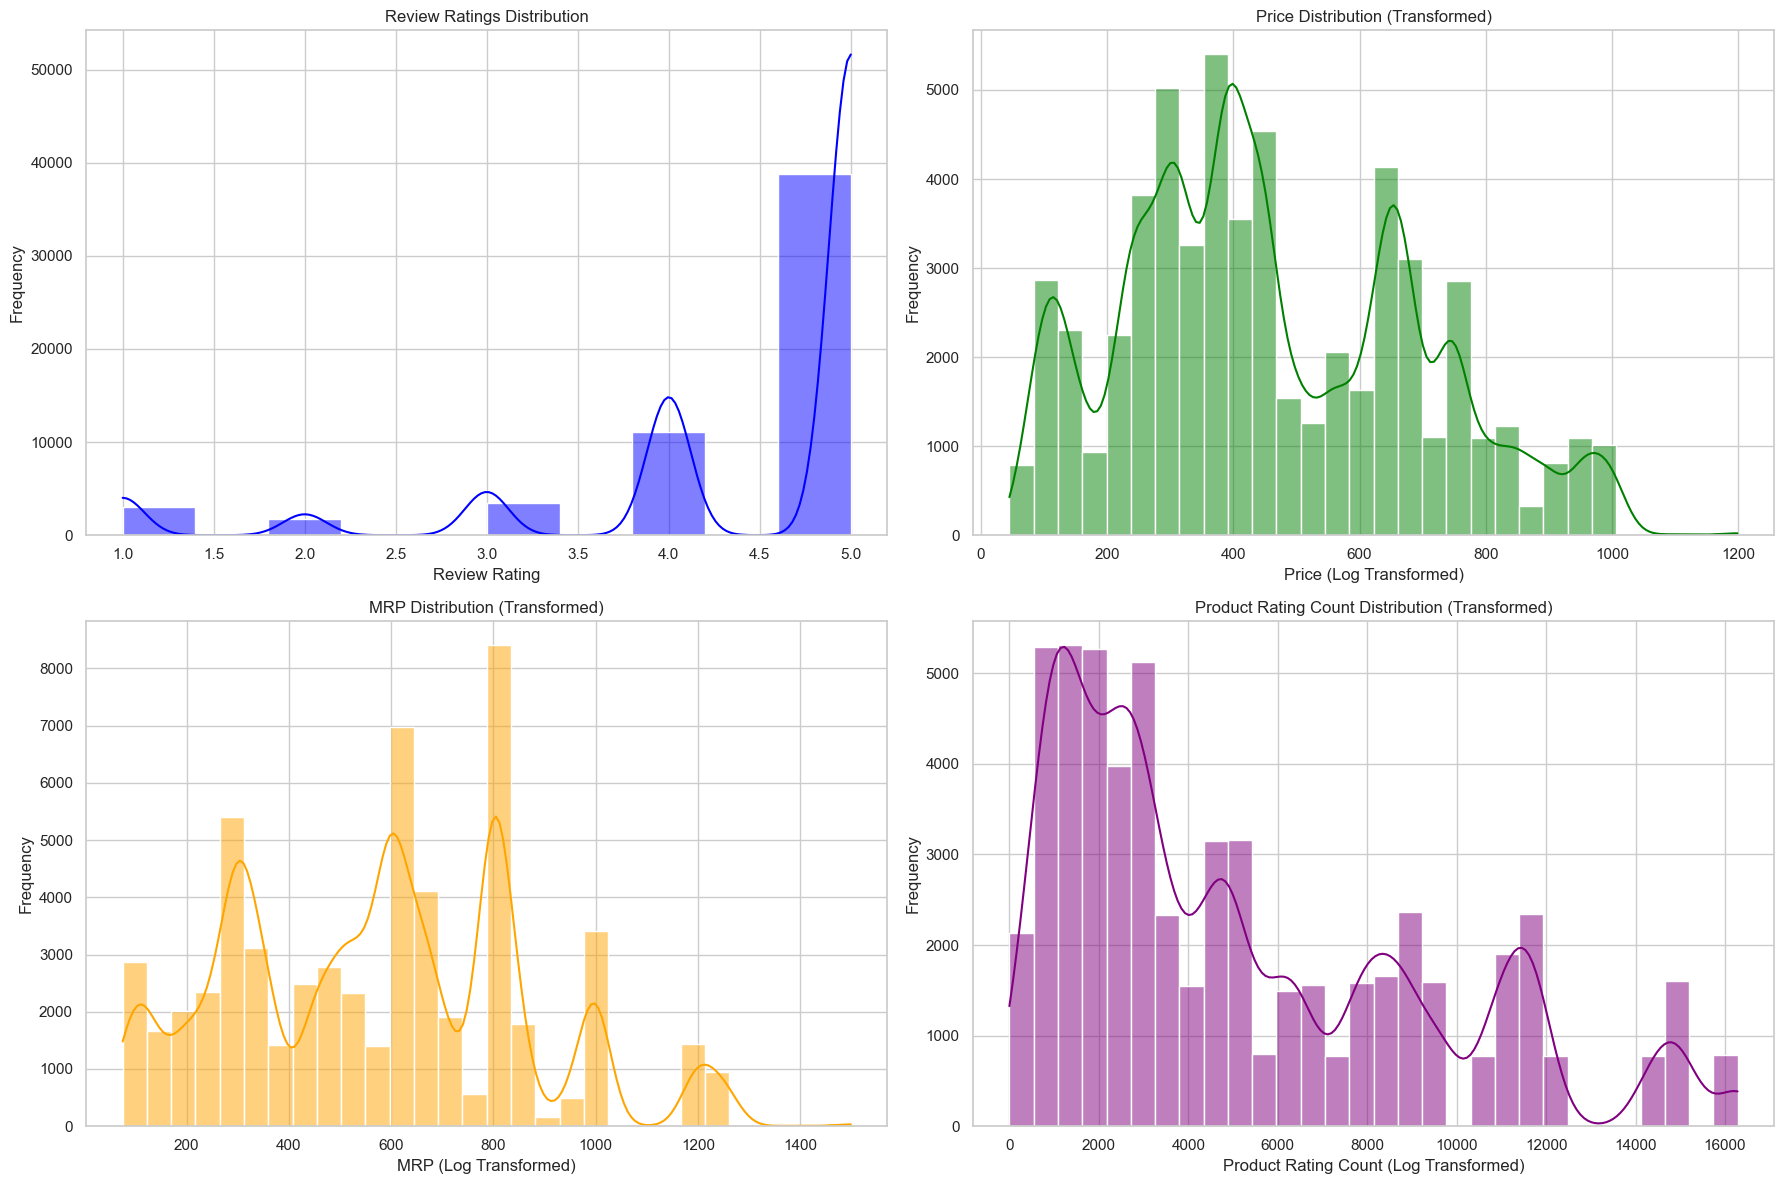

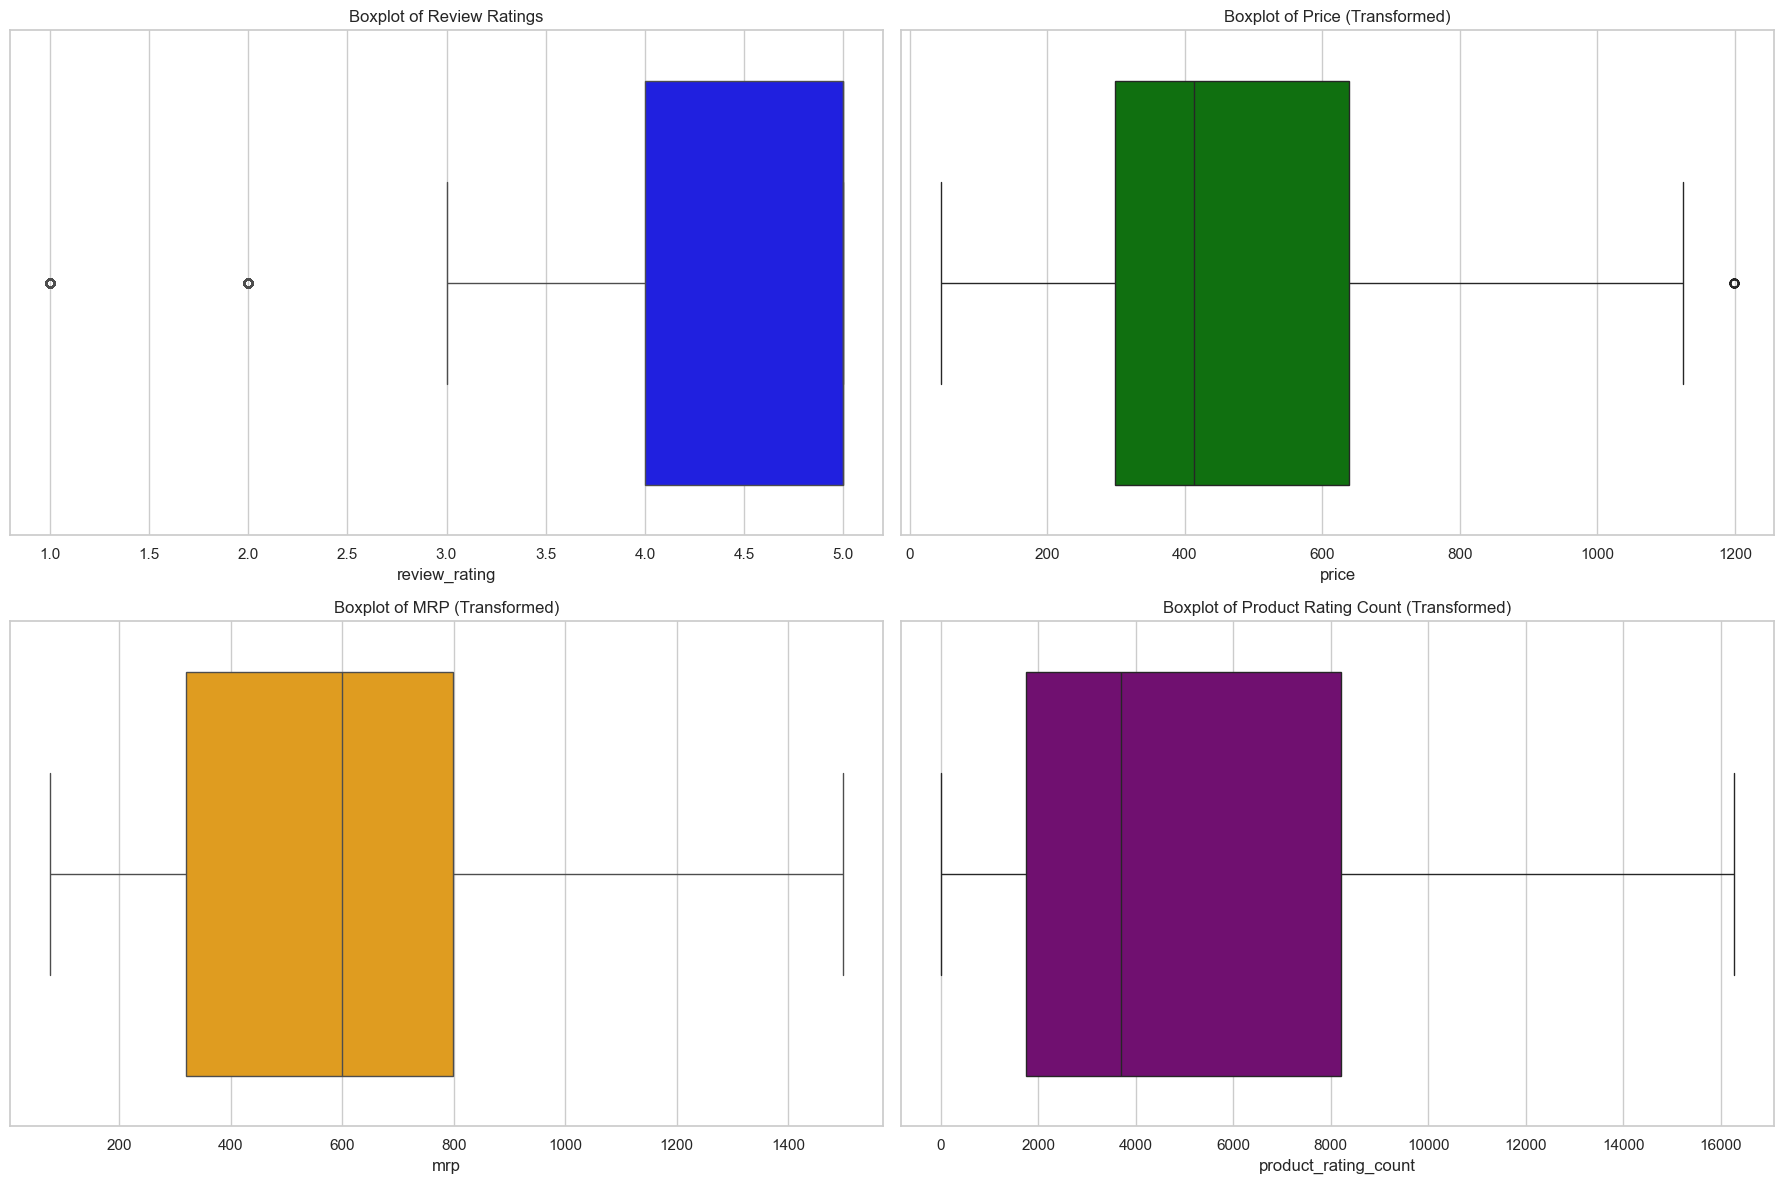

In [49]:
# Set up the plotting style
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(18, 12))

# Histograms for key numerical features
plt.subplot(2, 2, 1)
sns.histplot(data_transformed['review_rating'], bins=10, kde=True, color='blue')
plt.title("Review Ratings Distribution")
plt.xlabel("Review Rating")
plt.ylabel("Frequency")

plt.subplot(2, 2, 2)
sns.histplot(data_transformed['price'], bins=30, kde=True, color='green')
plt.title("Price Distribution (Transformed)")
plt.xlabel("Price (Log Transformed)")
plt.ylabel("Frequency")

plt.subplot(2, 2, 3)
sns.histplot(data_transformed['mrp'], bins=30, kde=True, color='orange')
plt.title("MRP Distribution (Transformed)")
plt.xlabel("MRP (Log Transformed)")
plt.ylabel("Frequency")

plt.subplot(2, 2, 4)
sns.histplot(data_transformed['product_rating_count'], bins=30, kde=True, color='purple')
plt.title("Product Rating Count Distribution (Transformed)")
plt.xlabel("Product Rating Count (Log Transformed)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Boxplots for variability and outliers
plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
sns.boxplot(x=data_transformed['review_rating'], color='blue')
plt.title("Boxplot of Review Ratings")

plt.subplot(2, 2, 2)
sns.boxplot(x=data_transformed['price'], color='green')
plt.title("Boxplot of Price (Transformed)")

plt.subplot(2, 2, 3)
sns.boxplot(x=data_transformed['mrp'], color='orange')
plt.title("Boxplot of MRP (Transformed)")

plt.subplot(2, 2, 4)
sns.boxplot(x=data_transformed['product_rating_count'], color='purple')
plt.title("Boxplot of Product Rating Count (Transformed)")

plt.tight_layout()
plt.show()

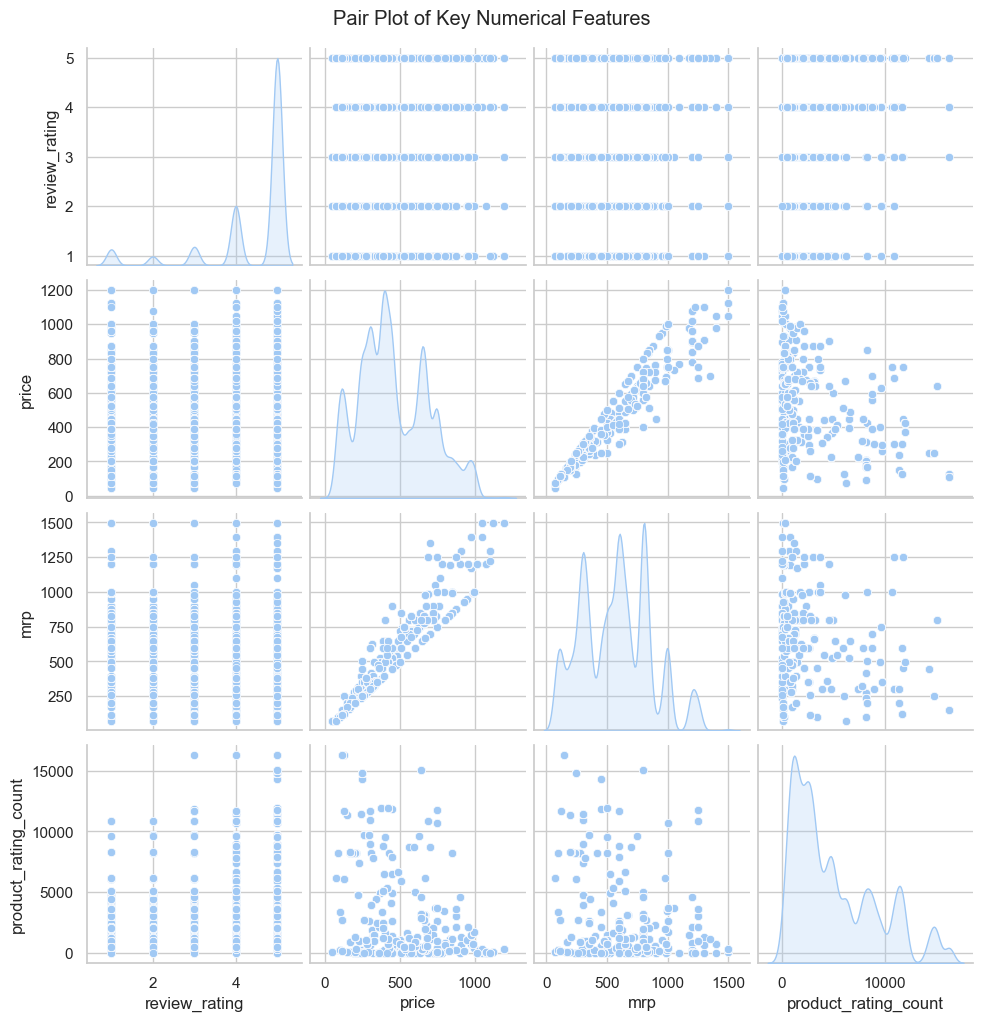

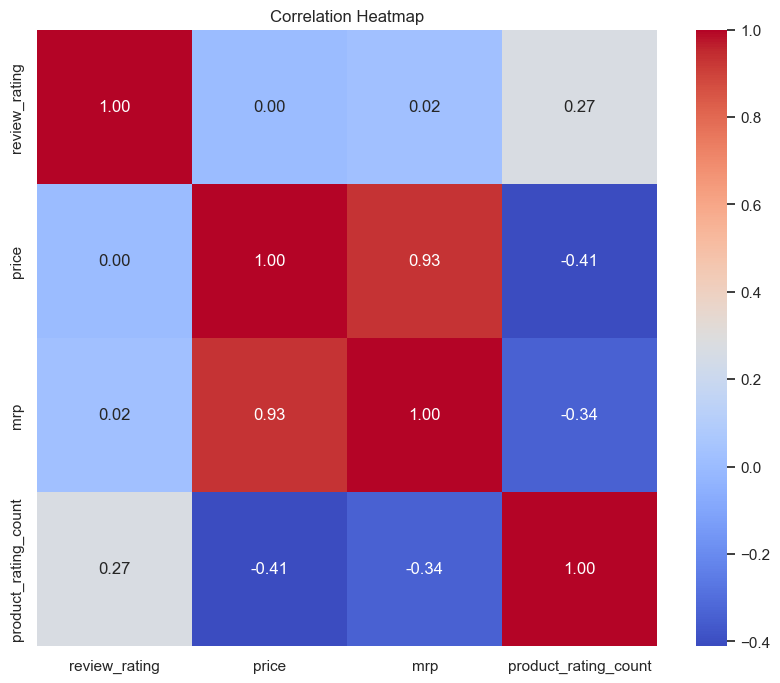

In [51]:
# Pair plot to analyze relationships among key numerical variables
sns.pairplot(data_transformed[['review_rating', 'price', 'mrp', 'product_rating_count']], diag_kind="kde")
plt.suptitle("Pair Plot of Key Numerical Features", y=1.02)
plt.show()

# Heatmap for correlation analysis
plt.figure(figsize=(10, 8))
correlation_matrix = data_transformed[['review_rating', 'price', 'mrp', 'product_rating_count']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_11932\537669155.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='review_rating', y='price', data=avg_price_by_rating, palette="Blues_d")
C:\Users\user\AppData\Local\Temp\ipykernel_11932\537669155.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='review_rating', data=data_transformed, palette="pastel")
C:\Users\user\AppData\Local\Temp\ipykernel_11932\537669155.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_transformed['product_rating_count'], shade=True, color="purple")


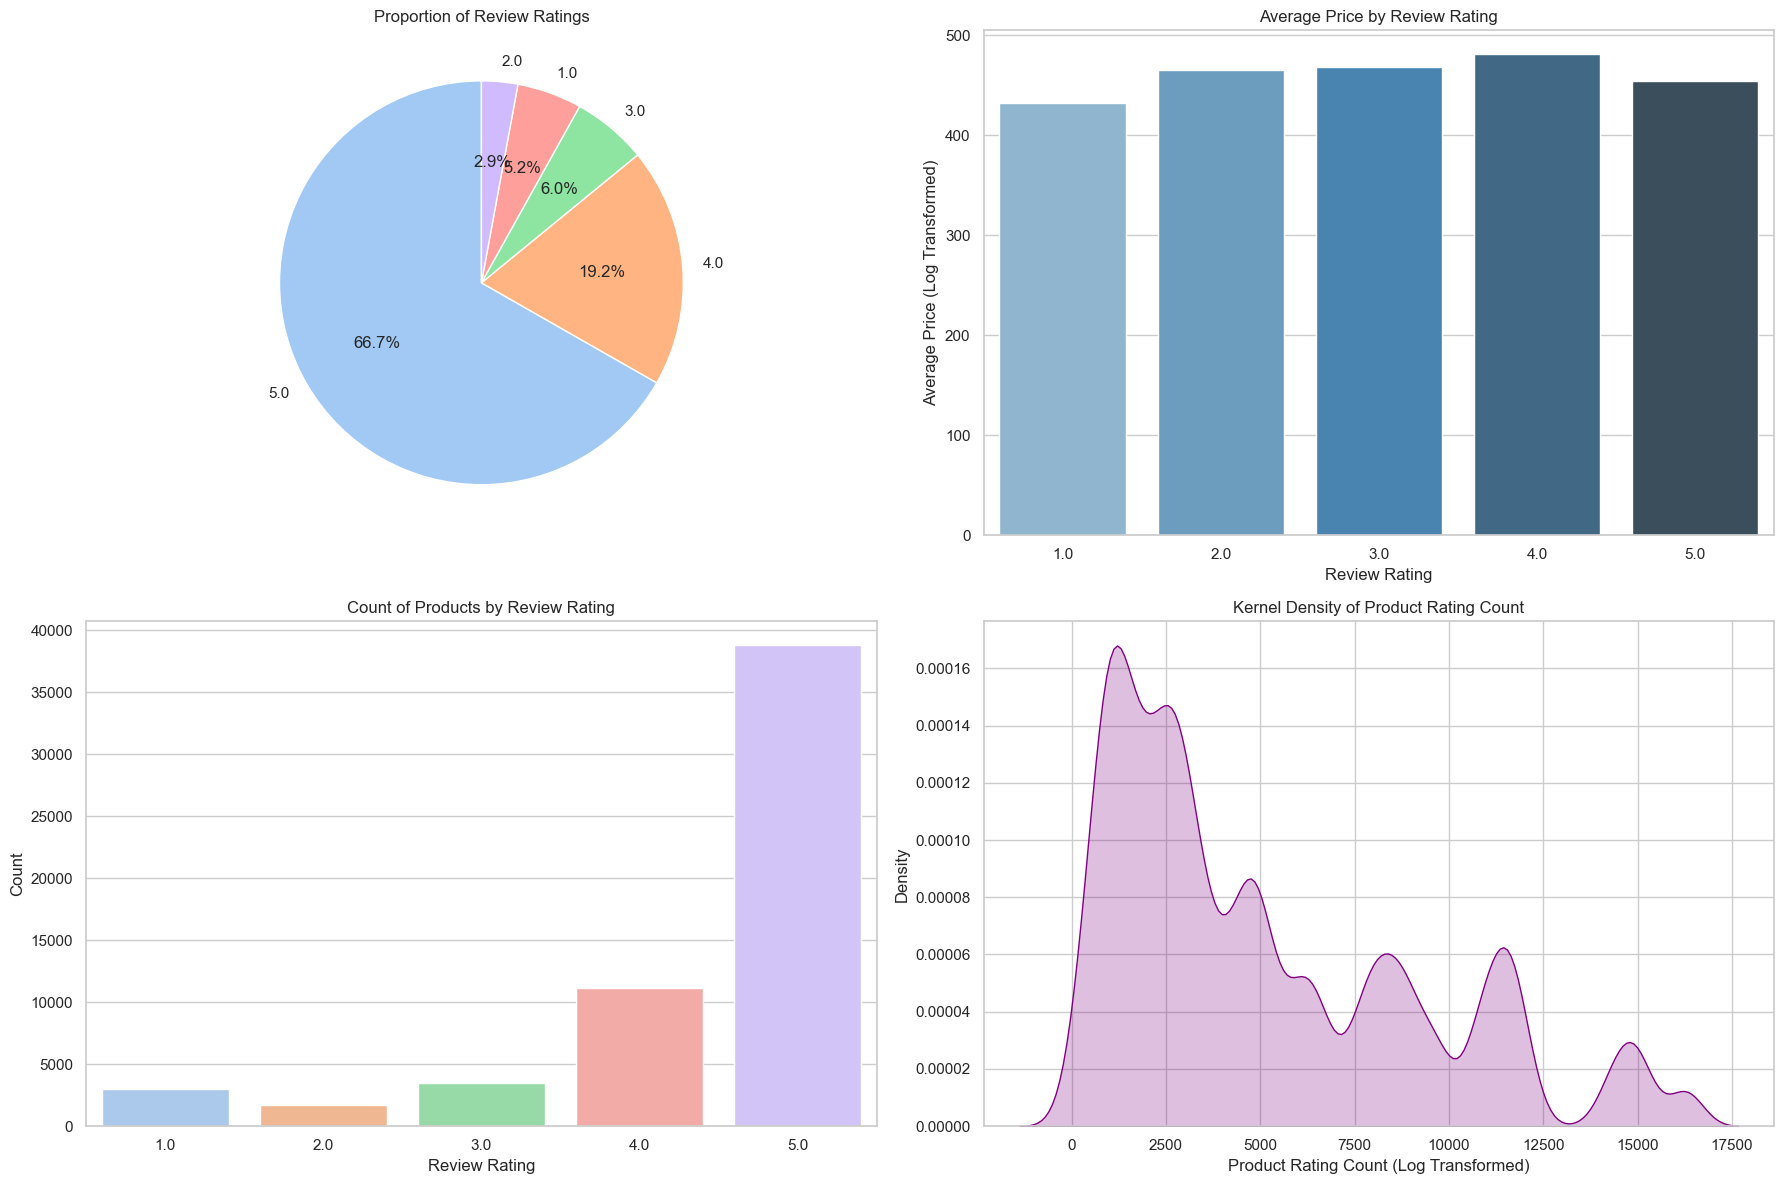

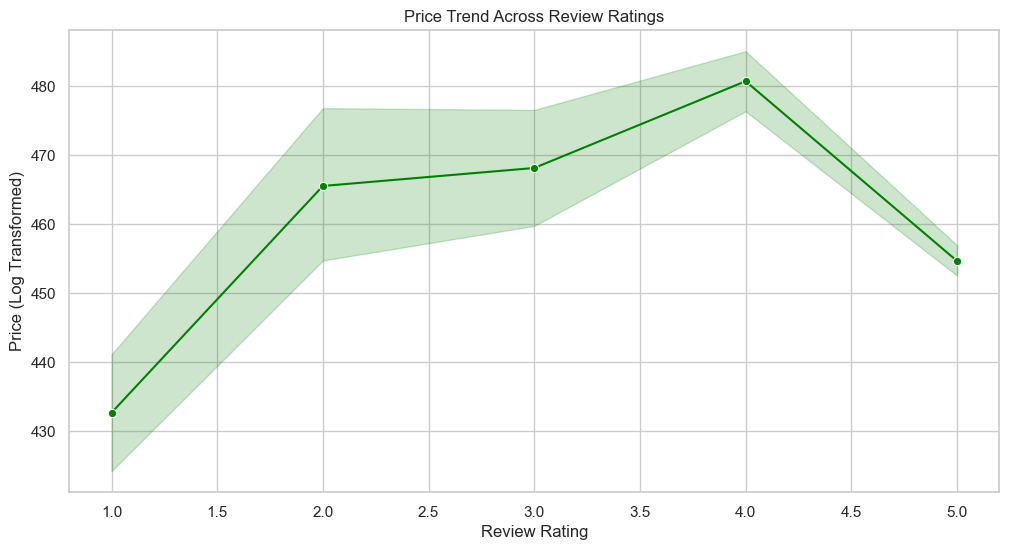

In [53]:
# Set up the plotting environment
plt.figure(figsize=(18, 12))

# 1. Pie Diagram: Proportion of review ratings
plt.subplot(2, 2, 1)
review_rating_counts = data_transformed['review_rating'].value_counts()
plt.pie(review_rating_counts, labels=review_rating_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title("Proportion of Review Ratings")

# 2. Bar Plot: Average price by rating
plt.subplot(2, 2, 2)
avg_price_by_rating = data_transformed.groupby('review_rating')['price'].mean().reset_index()
sns.barplot(x='review_rating', y='price', data=avg_price_by_rating, palette="Blues_d")
plt.title("Average Price by Review Rating")
plt.xlabel("Review Rating")
plt.ylabel("Average Price (Log Transformed)")

# 3. Count Plot: Count of products by rating
plt.subplot(2, 2, 3)
sns.countplot(x='review_rating', data=data_transformed, palette="pastel")
plt.title("Count of Products by Review Rating")
plt.xlabel("Review Rating")
plt.ylabel("Count")

# 4. KDE Plot: Kernel Density of Product Rating Count
plt.subplot(2, 2, 4)
sns.kdeplot(data_transformed['product_rating_count'], shade=True, color="purple")
plt.title("Kernel Density of Product Rating Count")
plt.xlabel("Product Rating Count (Log Transformed)")

plt.tight_layout()
plt.show()

# Line Plot: Price trend across sorted review ratings
sorted_data = data_transformed.sort_values(by='review_rating')
plt.figure(figsize=(12, 6))
sns.lineplot(x='review_rating', y='price', data=sorted_data, marker='o', color='green')
plt.title("Price Trend Across Review Ratings")
plt.xlabel("Review Rating")
plt.ylabel("Price (Log Transformed)")
plt.show()

# Feature Engineering

In [57]:
# Analyze cardinality of categorical features
cardinality = {col: data_transformed[col].nunique() for col in categorical_features}
print("Cardinality of Categorical Features:\n", cardinality)

# Set a threshold for high cardinality
high_cardinality_threshold = 100  # Arbitrary threshold
high_cardinality_features = [col for col, unique_count in cardinality.items() if unique_count > high_cardinality_threshold]

print("High Cardinality Features:", high_cardinality_features)

# Frequency encoding for high-cardinality features
for col in high_cardinality_features:
    freq_map = data_transformed[col].value_counts(normalize=True)
    data_transformed[col] = data_transformed[col].map(freq_map)

# Apply one-hot encoding to remaining categorical features
low_cardinality_features = [col for col in categorical_features if col not in high_cardinality_features]
data_encoded = pd.get_dummies(data_transformed, columns=low_cardinality_features, drop_first=True)

# Display resulting encoded dataset
data_encoded.head()

Cardinality of Categorical Features:
 {'brand_name': 11, 'review_title': 28010, 'review_text': 56830, 'author': 39954, 'review_date': 58010, 'review_label': 2, 'product_title': 245, 'product_url': 247}
High Cardinality Features: ['review_title', 'review_text', 'author', 'review_date', 'product_title', 'product_url']


,product_id,review_id,review_title,review_text,author,review_date,review_rating,is_a_buyer,pro_user,product_title,...,brand_name_Kay Beauty,brand_name_L'Oreal Paris,brand_name_Lakme,brand_name_Maybelline New York,brand_name_NYX Professional Makeup,brand_name_Nivea,brand_name_Nykaa Cosmetics,brand_name_Nykaa Naturals,brand_name_Olay,review_label_Verified Professional
23,60541,1622667,0.000017,0.000017,0.000017,0.000017,5.0,True,False,0.000362,...,False,False,False,False,False,False,False,False,True,False
24,60541,3999858,0.000017,0.000017,0.000430,0.000017,2.0,True,False,0.000362,...,False,False,False,False,False,False,False,False,True,False
25,60541,1807507,0.000017,0.000017,0.000551,0.000017,2.0,True,False,0.000362,...,False,False,False,False,False,False,False,False,True,False
26,60541,1032983,0.000017,0.000017,0.000017,0.000017,3.0,True,False,0.000362,...,False,False,False,False,False,False,False,False,True,False
27,60541,1623551,0.000999,0.000017,0.000017,0.000017,4.0,True,False,0.000362,...,False,False,False,False,False,False,False,False,True,False


# Feature Selection

In [11]:
# Reload the dataset
file_path = 'nyka_top_brands_cosmetics_product_reviews..csv'
data = pd.read_csv(file_path)

# Identify categorical features
categorical_features = data.select_dtypes(include=['object', 'bool']).columns.tolist()

# Frequency encoding for high-cardinality features
high_cardinality_threshold = 100  # Threshold for high cardinality
cardinality = {col: data[col].nunique() for col in categorical_features}
high_cardinality_features = [col for col, unique_count in cardinality.items() if unique_count > high_cardinality_threshold]

for col in high_cardinality_features:
    freq_map = data[col].value_counts(normalize=True)
    data[col] = data[col].map(freq_map)

# One-hot encode low-cardinality categorical features
low_cardinality_features = [col for col in categorical_features if col not in high_cardinality_features]
data_encoded = pd.get_dummies(data, columns=low_cardinality_features, drop_first=True)

# Handle missing values
# Option 1: Impute missing values
data_encoded.fillna(data_encoded.mean(), inplace=True)

# Target and features
target = 'review_rating'
features = [col for col in data_encoded.columns if col != target]

# Standardize numerical features for SelectKBest
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_encoded[features])
y = data_encoded[target]

# Feature selection
k_best_selector = SelectKBest(score_func=f_classif, k=10)  # Select top 10 features
X_k_best = k_best_selector.fit_transform(X_scaled, y)
selected_k_best_features = [features[i] for i in k_best_selector.get_support(indices=True)]

print("Top Features from SelectKBest:", selected_k_best_features)

Top Features from SelectKBest: ['review_id', 'review_title', 'product_title', 'product_rating', 'product_rating_count', 'product_url', 'brand_name_Kay Beauty', 'brand_name_Lakme', 'brand_name_Nykaa Cosmetics', 'is_a_buyer_True']


# Split Data into Training and Testing Sets

In [13]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 42898
Testing set size: 18386


# Feature Scaling

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the ML Model & Model Evaluation


In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

# Define regression models
regressors = {
    "Linear Regression": LinearRegression(),
    "SVR": SVR(),
    "MLP Regressor": MLPRegressor(max_iter=1000),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boost": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
}

# Train and evaluate regression models
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

for name, model in regressors.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"\n{name}")
    print(f"MAE (Mean Absolute Error): {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"MSE (Mean Squared Error): {mean_squared_error(y_test, y_pred):.2f}")
    print(f"RMSE (Root Mean Squared Error): {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
    print(f"R2 Score: {r2_score(y_test, y_pred):.2f}")


Linear Regression
MAE (Mean Absolute Error): 0.72
MSE (Mean Squared Error): 1.00
RMSE (Root Mean Squared Error): 1.00
R2 Score: 0.10

SVR
MAE (Mean Absolute Error): 0.58
MSE (Mean Squared Error): 1.02
RMSE (Root Mean Squared Error): 1.01
R2 Score: 0.09

MLP Regressor
MAE (Mean Absolute Error): 0.61
MSE (Mean Squared Error): 0.83
RMSE (Root Mean Squared Error): 0.91
R2 Score: 0.25

Random Forest Regressor
MAE (Mean Absolute Error): 0.60
MSE (Mean Squared Error): 0.90
RMSE (Root Mean Squared Error): 0.95
R2 Score: 0.19

Gradient Boost
MAE (Mean Absolute Error): 0.62
MSE (Mean Squared Error): 0.82
RMSE (Root Mean Squared Error): 0.90
R2 Score: 0.27

AdaBoost
MAE (Mean Absolute Error): 0.81
MSE (Mean Squared Error): 1.09
RMSE (Root Mean Squared Error): 1.04
R2 Score: 0.02


# Hyperparameter Tuning

In [26]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import warnings

# Example categorical columns in your dataset (replace with actual column names)
categorical_features = ['product_title']  # replace with your categorical columns
numerical_features = ['product_rating_count']  # replace with your numerical columns

# Create the ColumnTransformer with preprocessing for both categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Scale numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # OneHotEncode categorical features
    ])

# Define the model (RandomForestRegressor as an example)
model = RandomForestRegressor()

# Define the hyperparameter grid for RandomizedSearchCV
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}

warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.model_selection._search")

# RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,
    cv=5,
    scoring='r2',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Create the pipeline: First preprocess, then fit the model
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Apply preprocessing steps
    ('model', random_search)  # Fit the model with random search
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Evaluate the pipeline on the test data
y_pred = pipeline.predict(X_test)

# Calculate evaluation metrics
print(f"MAE (Mean Absolute Error): {mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE (Mean Squared Error): {mean_squared_error(y_test, y_pred):.2f}")
print(f"RMSE (Root Mean Squared Error): {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred):.2f}")

# Save the pipeline with the best model
joblib.dump(pipeline, 'random_forest_pipeline.pkl')
print(f"Pipeline saved as random_forest_pipeline.pkl")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
MAE (Mean Absolute Error): 0.00
MSE (Mean Squared Error): 0.00
RMSE (Root Mean Squared Error): 0.01
R2 Score: 1.00
Pipeline saved as random_forest_pipeline.pkl


In [28]:
best_model = pipeline.named_steps['model']
if hasattr(best_model, 'best_params_'):
    print("Best Parameters from RandomizedSearchCV:", best_model.best_params_)

Best Parameters from RandomizedSearchCV: {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': None}


# Load the Model

In [17]:
import joblib

loaded_pipeline = joblib.load('random_forest_pipeline.pkl')

# Test with Unseen Data

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Load the saved model
model_path = "random_forest_pipeline.pkl"
loaded_model = joblib.load(model_path)

# Load the original dataset
data = pd.read_csv("nyka_top_brands_cosmetics_product_reviews..csv")  # Corrected file name

# Extract 10 unseen rows (ensure these rows were not used for training/testing)
unseen_data = data.sample(10, random_state=42)  # Adjust as necessary
X_unseen = unseen_data.drop(columns=["review_rating"])  # Replace 'review_rating' with your target column name
y_actual = unseen_data["review_rating"]  # Replace 'review_rating' with your target column name

# Apply the same preprocessing as during training (example: scaling)
X_unseen_scaled = X_unseen  # Use directly if no preprocessing was applied

# Predict with the loaded model
y_pred = loaded_model.predict(X_unseen_scaled)

# Display predictions and actual values
unseen_results = pd.DataFrame({
    "Actual": y_actual,
    "Predicted": y_pred
})
print(unseen_results)

# Evaluate performance
mae = mean_absolute_error(y_actual, y_pred)
mse = mean_squared_error(y_actual, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_actual, y_pred)

if r2 >= 0:  # Proceed only if R² score is not negative
    print("\nPerformance on Unseen Data:")
    print(f"MAE (Mean Absolute Error): {mae:.2f}")
    print(f"MSE (Mean Squared Error): {mse:.2f}")
    print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
    print(f"R2 Score: {r2:.2f}")

       Actual  Predicted
51949     5.0        4.6
60227     4.0        4.4
689       5.0        3.8
37191     4.0        4.1
2982      5.0        3.9
24341     5.0        4.0
21247     5.0        3.8
13458     5.0        4.1
44596     5.0        4.4
44087     5.0        4.5


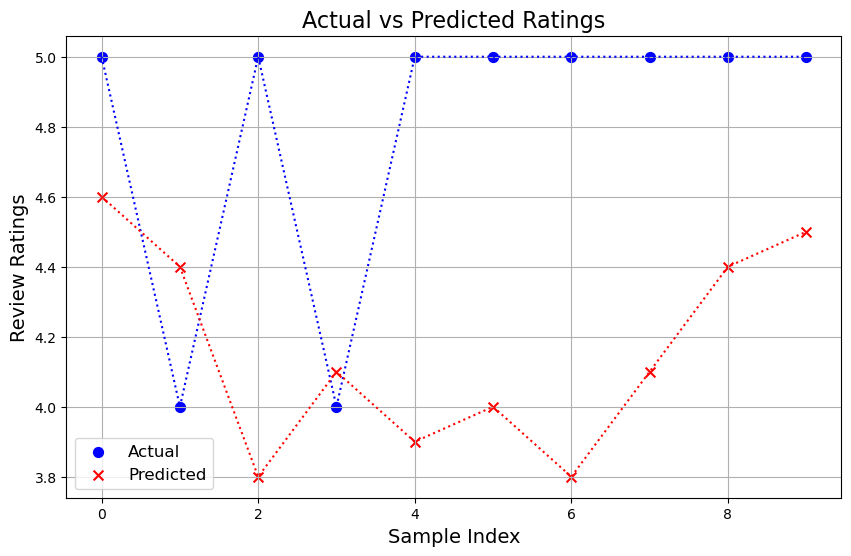

In [33]:
    # Visualization
    plt.figure(figsize=(10, 6))
    
    # Scatter plot for Actual vs Predicted
    plt.scatter(range(len(y_actual)), y_actual, color="blue", label="Actual", s=50)
    plt.scatter(range(len(y_pred)), y_pred, color="red", label="Predicted", s=50, marker="x")
    
    # Line plot to highlight trends
    plt.plot(range(len(y_actual)), y_actual, color="blue", linestyle="dotted")
    plt.plot(range(len(y_pred)), y_pred, color="red", linestyle="dotted")
    
    # Adding title and labels
    plt.title("Actual vs Predicted Ratings", fontsize=16)
    plt.xlabel("Sample Index", fontsize=14)
    plt.ylabel("Review Ratings", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()

# Conclusion

This project effectively analyzed and processed product reviews for cosmetics and beauty brands from Nykaa.com. Through thorough data preprocessing, exploratory data analysis (EDA), and the use of machine learning models, several important insights were gained:

Insights into Product Sentiments: Sentiment analysis uncovered trends in user reviews that offer valuable information about customer preferences and satisfaction levels.

Feature Importance: The analysis pinpointed crucial factors that affect product ratings, including specific review attributes, user sentiment scores, and brand popularity.

Predictive Models: A range of machine learning models was employed to predict product trends and sales potential based on review data. The performance of these models highlights their effectiveness in understanding customer behavior and refining product strategies.

This work showcases the potential of machine learning in the retail and cosmetics sectors, especially in enhancing customer experience and optimizing marketing approaches.

# Further Work

Some directions for improvement and extension of the work include the following:

Adding More Data Sources: Increasing the dataset by including user reviews from other available sites would allow for a more comprehensive analysis.

Advanced Sentiment Analysis: More sophisticated natural language processing techniques, like transformers or deep learning models, could make it possible to carry out a more nuanced sentiment classification.

Real-Time Prediction: A stream-recommendation or prediction engine should be developed to assist users in making a choice based on live reviews or trends.

Customer Segmentation: Clustering analysis could be done to identify groups of customers and develop strategies specific to each group.

Adding Visual Data: Computer vision methods should be deployed to analyze the visual components of the product that may affect consumer choices, should the product have images or videos, besides reviews.

Enhancing Interpretability: A project would need to make models more interpretable so that industries can understand and interpret what is driving the predictions.

Thus, this will lead on toward something of greater value in cosmetics and beauty fields. 